# Part 1: Data Preprocessing

In [1]:
import pandas as pd
pd.__version__

'1.3.4'

In [2]:
# read the csv file
df = pd.read_csv('./dataset/data/train.csv', sep=',')
df

,age,sex,bmi,children,smoker,region,charge,label
0,27,male,28.500,0,yes,northwest,18310.74200,1
1,18,female,37.290,1,no,southeast,2219.44510,0
2,43,female,20.045,2,yes,northeast,19798.05455,1
3,35,female,38.095,2,no,northeast,24915.04626,1
4,59,male,25.460,1,no,northeast,12913.99240,0
...,...,...,...,...,...,...,...,...
995,57,female,28.785,4,no,northeast,14394.39815,1
996,40,female,33.000,3,no,southeast,7682.67000,0
997,48,male,36.670,1,no,northwest,28468.91901,1
998,41,male,37.050,2,no,northwest,7265.70250,0


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charge', 'label'], dtype='object')

In [4]:
# remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charge      0
label       0
dtype: int64

In [6]:
# map the value of 'sex' feature as 'male' = 1 and 'female' = 0
# map the value of 'smoker' feature as 'yes' = 1 and 'no' = 0
df.loc[:, 'sex'] = df.loc[:, 'sex'].replace({'male': 1, 'female': 0})
df.loc[:, 'smoker'] = df.loc[:, 'smoker'].replace({'yes': 1, 'no': 0})

C:\Users\lung1\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
df

,age,sex,bmi,children,smoker,region,charge,label
0,27,1,28.500,0,1,northwest,18310.74200,1
1,18,0,37.290,1,0,southeast,2219.44510,0
2,43,0,20.045,2,1,northeast,19798.05455,1
3,35,0,38.095,2,0,northeast,24915.04626,1
4,59,1,25.460,1,0,northeast,12913.99240,0
...,...,...,...,...,...,...,...,...
995,57,0,28.785,4,0,northeast,14394.39815,1
996,40,0,33.000,3,0,southeast,7682.67000,0
997,48,1,36.670,1,0,northwest,28468.91901,1
998,41,1,37.050,2,0,northwest,7265.70250,0


In [8]:
# get one-hot encoded vector
df_rank = pd.get_dummies(df['region'])
df_rank

,northeast,northwest,southeast,southwest
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,1,0,0,0
996,0,0,1,0
997,0,1,0,0
998,0,1,0,0


In [9]:
# combine the table
df = pd.concat([df.age, df.sex, df.bmi, df.children, df.smoker, df_rank, df.charge, df.label], axis=1)
df

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charge,label
0,27,1,28.500,0,1,0,1,0,0,18310.74200,1
1,18,0,37.290,1,0,0,0,1,0,2219.44510,0
2,43,0,20.045,2,1,1,0,0,0,19798.05455,1
3,35,0,38.095,2,0,1,0,0,0,24915.04626,1
4,59,1,25.460,1,0,1,0,0,0,12913.99240,0
...,...,...,...,...,...,...,...,...,...,...,...
995,57,0,28.785,4,0,1,0,0,0,14394.39815,1
996,40,0,33.000,3,0,0,0,1,0,7682.67000,0
997,48,1,36.670,1,0,0,1,0,0,28468.91901,1
998,41,1,37.050,2,0,0,1,0,0,7265.70250,0


Text(0.5, 1.0, 'Correlations between the 9 features in the dataset')

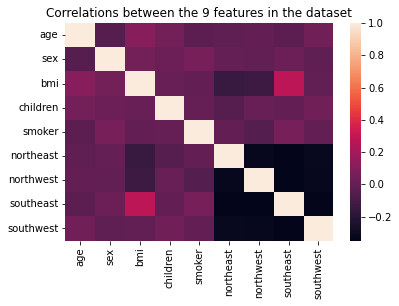

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df.iloc[:,:9].corr()
ax = sns.heatmap(df_corr)
ax.set_title("Correlations between the 9 features in the dataset")

# Part 2: Regression

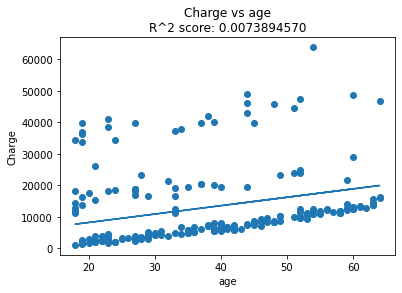

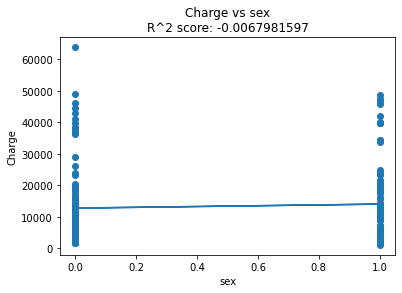

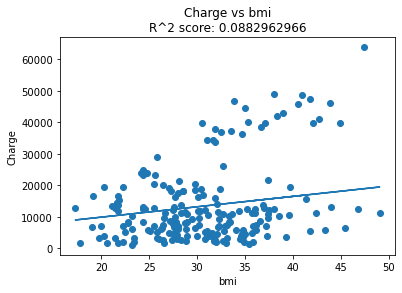

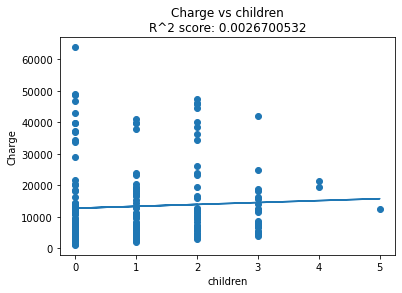

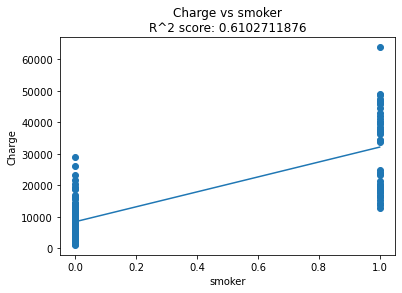

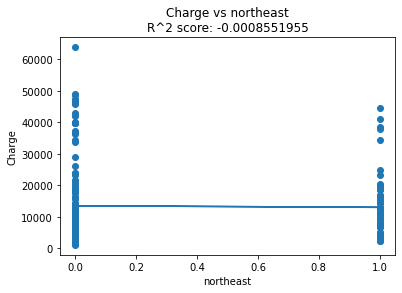

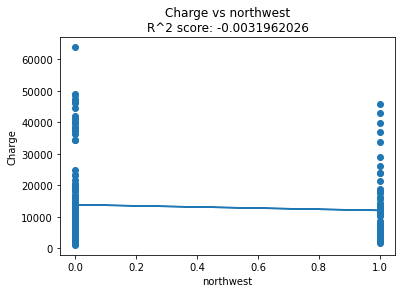

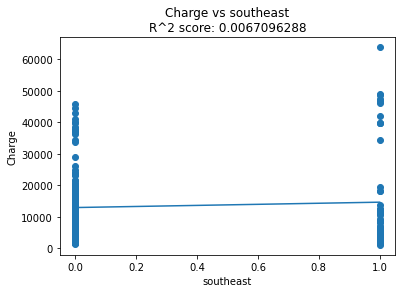

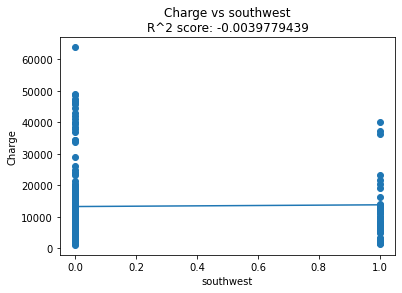

Charge vs age's R^2 score: 0.0073894570
Charge vs sex's R^2 score: -0.0067981597
Charge vs bmi's R^2 score: 0.0882962966
Charge vs children's R^2 score: 0.0026700532
Charge vs smoker's R^2 score: 0.6102711876
Charge vs northeast's R^2 score: -0.0008551955
Charge vs northwest's R^2 score: -0.0031962026
Charge vs southeast's R^2 score: 0.0067096288
Charge vs southwest's R^2 score: -0.0039779439


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, r2_score
import numpy as np

r2_all = []

features = df.columns[:9]
for feature in features:
    
    X_train, X_test, y_train, y_test = train_test_split(df[feature].to_numpy(), df['charge'].to_numpy(), test_size=0.2, random_state=4211)
    model = LinearRegression()
    model.fit(X_train[:, np.newaxis], y_train)
    
    ypred = model.predict(X_test[:, np.newaxis])
    
    # find R^2 score for the prediction
    r2 = r2_score(y_test, ypred)
    
    r2_all.append('Charge vs ' + feature + '\'s R^2 score: %.10f' % r2)
    
    plt.title('Charge vs ' + feature + '\nR^2 score: %.10f' % r2)
    plt.xlabel(feature)
    plt.ylabel('Charge')
    plt.scatter(X_test, y_test)
    plt.plot(X_test, ypred)
    plt.show()

for r2 in r2_all:
    print(r2)

In [12]:
X = np.array(df.loc[:, features])

X_train, X_test, y_train, y_test = train_test_split(X, df['charge'].to_numpy(), test_size=0.2, random_state=4211)
model = LinearRegression()
model.fit(X_train, y_train)

ypred = model.predict(X_test)
print('R^2 score for the the relationship between the linear combination of the 9 features and charge:\n%.10f' % r2_score(y_test, ypred))

R^2 score for the the relationship between the linear combination of the 9 features and charge:
0.7632440008


# Part 3: Classification

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler

## 6.1 Feature selection

In [14]:
# X without label column
X = df.iloc[:,:-2].to_numpy()
# Y is label
Y = df['label'].to_numpy()

# display format
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(suppress=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4211)

# ANOVA F-value
print("ANOVA F-value")
anova_stats = SelectKBest(f_classif, k=7)
anova_fit = anova_stats.fit(X_train, y_train)
anova_score = anova_fit.scores_

print(pd.DataFrame(anova_score, index=df.drop('label', axis=1).drop('charge', axis=1).columns))
# print(anova_score)
print('\n')
print('============================================')

# chi-squared

print("chi-squared statistics:")
chi2_stats = SelectKBest(chi2, k=7)
chi2_fit = chi2_stats.fit(X_train, y_train)
chi2_score = chi2_fit.scores_

print(pd.DataFrame(chi2_score, index=df.drop('label', axis=1).drop('charge', axis=1).columns))
# print(chi2_score)
print('\n')
print('============================================')


# muttal information

print("mutual information:")
mutual_stats = SelectKBest(mutual_info_classif, k=7)
mutual_fit = mutual_stats.fit(X_train, y_train)
mutual_score = mutual_fit.scores_

print(pd.DataFrame(mutual_score, index=df.drop('label', axis=1).drop('charge', axis=1).columns))
# print(mutual_score)


# Use the scores calculated with the ANOVA F-value to perform feature selection for the following questions.
X_train = anova_stats.fit_transform(X_train, y_train)
X_test = anova_stats.fit_transform(X_test, y_test)
print('\n')

ANOVA F-value
                        0
age         20.4078214604
sex          0.9292233804
bmi          0.6416829846
children     1.2331844718
smoker    1057.6018569724
northeast    0.0430357268
northwest    0.8741293769
southeast    3.3008599694
southwest    0.5146940850


chi-squared statistics:
                       0
age       101.4250561098
sex         0.4646529014
bmi         0.7755484700
children    1.6560866304
smoker    360.4031620553
northeast   0.0328824875
northwest   0.6562482445
southeast   2.4169709653
southwest   0.3891596425


mutual information:
                     0
age       0.0709065817
sex       0.0000000000
bmi       0.0000000000
children  0.0016672064
smoker    0.3165887699
northeast 0.0057785858
northwest 0.0000000000
southeast 0.0152231941
southwest 0.0173681793




## 6.2 Logistic Regression

In [15]:
import time
import random

In [16]:
train_times = []
accuracies = []
f1scores = []
last_model = None

for i in range(3):
    print('================= setting ' + str(i+1) + ' =================')
    # standardize the training data attained above
    X_train = StandardScaler().fit_transform(X_train, y_train)

    clf_sgd = SGDClassifier(loss='log', penalty='l2', max_iter=200, random_state=i, verbose=0, eta0=0.7) # loss='log' means Logistic Regression
    
    # save the last model to be used in the next part
    if(i == 2):
        last_model = clf_sgd
    
    # evaluation of time taken as well as model fitting
    start_time = time.time()
    clf_sgd.fit(X_train, y_train)
    train_time = time.time() - start_time

    # validation
    X_test = StandardScaler().fit_transform(X_test, y_test) # standardization
    y_pred = clf_sgd.predict(X_test)

    # finding accuracy and f1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    train_times.append(train_time)
    accuracies.append(accuracy)
    f1scores.append(f1score)

    print('train_time = %.10f' % train_time)
    print('accuracy = %.10f' % accuracy)
    print('f1score = %.10f' % f1score)
    
print('============================================')
results = pd.DataFrame({'time': train_times, 'accuracy': accuracies, 'f1 score': f1scores})
print(results)
print(results.describe()[1:3])

================= setting 1 =================
train_time = 0.0029902458
accuracy = 0.5950000000
f1score = 0.3305785124
================= setting 2 =================
train_time = 0.0019931793
accuracy = 0.6250000000
f1score = 0.3589743590
================= setting 3 =================
train_time = 0.0019938946
accuracy = 0.6350000000
f1score = 0.4065040650
          time     accuracy     f1 score
0 0.0029902458 0.5950000000 0.3305785124
1 0.0019931793 0.6250000000 0.3589743590
2 0.0019938946 0.6350000000 0.4065040650
             time     accuracy     f1 score
mean 0.0023257732 0.6183333333 0.3653523121
std  0.0005754502 0.0208166600 0.0383624960


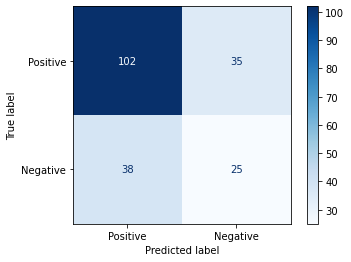

In [17]:
disp = plot_confusion_matrix(last_model, X_test, y_test,
                             display_labels=['Positive', 'Negative'],
                             cmap=plt.cm.Blues,
                             values_format='.5g')
# disp.ax_.set_title('Spiders absent / present classification')
plt.show()

## 6.3 Single-hidden-layer Neural Networks

In [18]:
# model definition
from sklearn.neural_network import MLPClassifier
import random

hidden_units = []
train_times = []
accuracies = []
f1scores = []

# number of hidden units to be used
H = [1, 2, 8, 16, 64, 128]

for h in H:
    for i in range(3):
        # X without label column
        X = df.iloc[:,:-2].to_numpy()
        # Y is label
        Y = df['label'].to_numpy()

        # display format
        pd.options.display.float_format = '{:.10f}'.format
        np.set_printoptions(suppress=True)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4211)

        # Use the scores calculated with the ANOVA F-value to perform feature selection for the following questions.
        X_train = anova_stats.fit_transform(X_train, y_train)
        X_test = anova_stats.fit_transform(X_test, y_test)

        # standardization
        X_train = StandardScaler().fit_transform(X_train, y_train)
        X_test = StandardScaler().fit_transform(X_test, y_test)

        clf = MLPClassifier(hidden_layer_sizes=(h, ), solver='sgd', learning_rate='invscaling', learning_rate_init=0.1, max_iter=500, verbose=0,
                       random_state=i*4444, early_stopping=True)

        # time calculation and model fitting
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time

        # prediction
        y_pred = clf.predict(X_test)

        # saves the values to be displayed
        hidden_unit = h
        accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        
        hidden_units.append(hidden_unit)
        train_times.append(train_time)
        accuracies.append(accuracy)
        f1scores.append(f1score)
        

# print('\n\n\n')
results = pd.DataFrame({'number of hidden units': hidden_units, 'time': train_times, 'accuracy': accuracies, 'f1 score': f1scores})
print(results)

    number of hidden units         time     accuracy     f1 score
0                        1 0.0089697838 0.6200000000 0.3448275862
1                        1 0.0079739094 0.6850000000 0.0000000000
2                        1 0.0079734325 0.7350000000 0.6241134752
3                        2 0.0089697838 0.7200000000 0.2000000000
4                        2 0.0079731941 0.6850000000 0.0000000000
5                        2 0.0089697838 0.6700000000 0.0294117647
6                        8 0.0179398060 0.6300000000 0.2884615385
7                        8 0.0089702606 0.7650000000 0.4470588235
8                        8 0.0099668503 0.7000000000 0.0909090909
9                       16 0.0239198208 0.6000000000 0.2857142857
10                      16 0.0189366341 0.6100000000 0.2777777778
11                      16 0.0169436932 0.6500000000 0.3000000000
12                      64 0.0232129097 0.6000000000 0.2452830189
13                      64 0.0318930149 0.6200000000 0.3448275862
14        

In [19]:
mean_acc = []
mean_f1 = []

# separate the rows according to the number of hidden units
for i in range(6):
    temp_hidden_units = []
    temp_train_times = []
    temp_accuracies = []
    temp_f1scores = []
    for j in range(3):
        temp_hidden_units.append(hidden_units[3*i+j])
        temp_train_times.append(train_times[3*i+j])
        temp_accuracies.append(accuracies[3*i+j])
        temp_f1scores.append(f1scores[3*i+j])
        temp_results = pd.DataFrame({'time': temp_train_times,
                                     'accuracy': temp_accuracies, 'f1 score': temp_f1scores})
    print('For h = ' + str(H[i]))
    print(temp_results.describe()[1:3])
    mean_acc.append(temp_results.describe()[1:3].loc[:, 'accuracy'][0]) # mean of accuracy
    mean_f1.append(temp_results.describe()[1:3].loc[:, 'f1 score'][0]) # mean of f1 score
    print('')
    print('============================================')
    

For h = 1
             time     accuracy     f1 score
mean 0.0083057086 0.6800000000 0.3229803538
std  0.0005751061 0.0576628130 0.3126297869

For h = 2
             time     accuracy     f1 score
mean 0.0086375872 0.6916666667 0.0764705882
std  0.0005753813 0.0256580072 0.1079856456

For h = 8
             time     accuracy     f1 score
mean 0.0122923056 0.6983333333 0.2754764843
std  0.0049161970 0.0675154303 0.1784295848

For h = 16
             time     accuracy     f1 score
mean 0.0199333827 0.6200000000 0.2878306878
std  0.0035932882 0.0264575131 0.0112612681

For h = 64
             time     accuracy     f1 score
mean 0.0250132879 0.6183333333 0.2982908366
std  0.0061794737 0.0175594229 0.0500867873

For h = 128
             time     accuracy     f1 score
mean 0.0302321116 0.6216666667 0.2734691873
std  0.0005757255 0.0125830574 0.0736073310



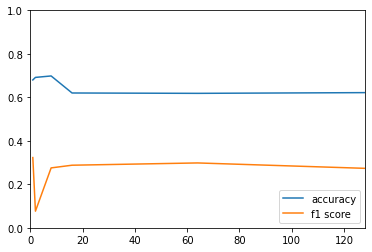

In [20]:
plt.plot(H, mean_acc, label='accuracy')
plt.plot(H, mean_f1, label='f1 score')
plt.xlim(0, 128)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# Part 4: Performance Enhancement

## 7.1 Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform

In [22]:
# data cleaning
df_test = pd.read_csv('./dataset/data/test.csv', sep=',')

df_test.loc[:, 'sex'] = df_test.loc[:, 'sex'].replace({'male': 1, 'female': 0})
df_test.loc[:, 'smoker'] = df_test.loc[:, 'smoker'].replace({'yes': 1, 'no': 0})

df_test_rank = pd.get_dummies(df_test['region'])

df_test = pd.concat([df_test.age, df_test.sex, df_test.bmi, df_test.children, df_test.smoker, df_test_rank,
                     df_test.charge, df_test.label], axis=1)
df_test

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charge,label
0,59,0,26.5050000000,0,0,1,0,0,0,12815.4449500000,0
1,35,0,31.0000000000,1,0,0,0,0,1,5240.7650000000,0
2,57,0,23.1800000000,0,0,0,1,0,0,11830.6072000000,0
3,52,0,37.5250000000,2,0,0,1,0,0,33471.9718900000,1
4,44,0,36.9550000000,1,0,0,1,0,0,8023.1354500000,0
...,...,...,...,...,...,...,...,...,...,...,...
333,24,1,28.5000000000,0,1,1,0,0,0,35147.5284800000,1
334,56,1,33.6600000000,4,0,0,0,1,0,12949.1554000000,0
335,60,1,25.7400000000,0,0,0,0,1,0,12142.5786000000,0
336,64,1,40.4800000000,0,0,0,0,1,0,13831.1152000000,1


In [23]:
X_test = df_test.iloc[:,:-2]
y_test = df_test.loc[:,'label']

X_test = anova_stats.fit_transform(X_test, y_test)


# X without label column
X = df.iloc[:,:-1].to_numpy()
# Y is label
Y = df['label'].to_numpy()
X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=4211)

# feature selection
X_train = anova_stats.fit_transform(X_train,y_train)
X_validate = anova_stats.fit_transform(X_validate, y_validate)


# standardization
X_validate = StandardScaler().fit_transform(X_validate, y_validate)
X_train = StandardScaler().fit_transform(X_train, y_train)
X_test = StandardScaler().fit_transform(X_test, y_test)

In [24]:
param_grid = {
    'hidden_layer_sizes': [[16],[64],[128]],
    'learning_rate_init': [0.1],
    'learning_rate': ['invscaling'],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'random_state':[4211],
    'early_stopping':[True],
    'max_iter':[500]
}

mlp = MLPClassifier()

grid = GridSearchCV(mlp, param_grid, cv=5, verbose=0)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [[16], [64], [128]],
                         'learning_rate': ['invscaling'],
                         'learning_rate_init': [0.1], 'max_iter': [500],
                         'random_state': [4211], 'solver': ['adam', 'sgd']})

In [25]:
# Utility function to report best scores
def report(results, n_top=10):
    params_ranked = []
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
#         print(candidates)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            params_ranked.append(results['params'][candidate])
            print('============================================')
            print('')
    return params_ranked

In [26]:
params_ranked = report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.986 (std: 0.008)
Parameters: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.979 (std: 0.016)
Parameters: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [128], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.976 (std: 0.008)
Parameters: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [128], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 4
Mean validation score: 0.975 (std: 0.011)
Parameters: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 

In [27]:
for i in range(len(params_ranked)):
    print(params_ranked[i])

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [128], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [128], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [16], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
{'activation': 'tanh', 'early_stopping': True, '

In [28]:
# save the models trained for ranking
models = []

for param in params_ranked:
    results = [] # temporarily store the results
    for i in range(5):
        clfnew = MLPClassifier(**param)
    
        # X without label column
        X = df.iloc[:,:-2].to_numpy()
        # Y is label
        Y = df['label'].to_numpy()
        X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=i)

        # feature selection
        X_train = anova_stats.fit_transform(X_train,y_train)
        X_validate = anova_stats.fit_transform(X_validate, y_validate)
        
        # standardization
        X_validate = StandardScaler().fit_transform(X_validate, y_validate)
        X_train = StandardScaler().fit_transform(X_train, y_train)
        X_test = StandardScaler().fit_transform(X_test, y_test)

        start_time = time.time()
        clfnew.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # prediction
        y_pred = clfnew.predict(X_validate)

        # accuracy and f1
        accuracy = accuracy_score(y_validate, y_pred)
        f1score = f1_score(y_validate, y_pred)
        
        results.append({"param": param, "train time": train_time, "accuracy": accuracy, "f1 score": f1score})
        
    results_df = pd.DataFrame({'accuracy': [i['accuracy'] for i in results]})
    models.append({'params': param, 'mean': results_df.loc[:,'accuracy'].mean(), 'sd': results_df.loc[:,'accuracy'].std()})
    

In [29]:
# sort the models according to mean
models_sorted = pd.DataFrame(models).sort_values(by=['mean'], ascending=False)
# print(models_sorted)

for i in range(3):
    model = models_sorted.iloc[i,:]
    print('Rank ' + str(i+1) + ' parameters: ', end=' ')
    print(model['params'])
    print('Mean: %.10f' % model['mean'])
    print('SD: %.10f' % model['sd'])
    print('============================================')

Rank 1 parameters:  {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [16], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
Mean: 0.6990000000
SD: 0.1316909260
Rank 2 parameters:  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'adam'}
Mean: 0.6940000000
SD: 0.1339496174
Rank 3 parameters:  {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': [64], 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 4211, 'solver': 'sgd'}
Mean: 0.6930000000
SD: 0.1193000419


Accuracy: 0.6153846154
F1 score: 0.3627450980


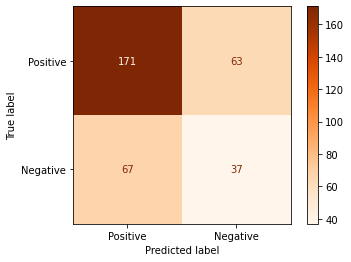

In [30]:
clf = MLPClassifier(**models_sorted.loc[0,'params'])

### data clearning and preparation

# X without label column
X = df.iloc[:,:-2].to_numpy()
# Y is label
Y = df['label'].to_numpy()

X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=4211)

# testing set
X_test = df_test.iloc[:,:-2].to_numpy()
Y_test = df_test['label'].to_numpy()

# feature selection
X_train = anova_stats.fit_transform(X_train,y_train)
X_validate = anova_stats.fit_transform(X_validate, y_validate)
X_test = anova_stats.fit_transform(X_test, y_test)

# standardization
X_train = StandardScaler().fit_transform(X_train, y_train)
X_validate = StandardScaler().fit_transform(X_validate, y_validate)
X_test = StandardScaler().fit_transform(X_test, y_test)

###

start_time = time.time()
clf.fit(X_train, y_train)
time_taken = time.time() - start_time

# prediction
y_pred = clf.predict(X_test)

# accuracy and f1 score
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

# plot confusion matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['Positive', 'Negative'],
                             cmap=plt.cm.Oranges,
                             values_format='.5g')

print('Accuracy: %.10f' % accuracy)
print('F1 score: %.10f' % f1score)
plt.show()

## Comparison of Classification Methods

### Logistic Regression

In [31]:
# learning rate scheduling types to be used
methods = ['constant', 'optimal', 'invscaling']

for i in range(3):
    print('================= learning rate scheduling type = ' + methods[i] + ' =================')
    
    
    
    # X without label column
    X = df.iloc[:,:-2].to_numpy()
    # Y is label
    Y = df['label'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4211)

    # feature selection
    X_train = anova_stats.fit_transform(X_train,y_train)
    X_test = anova_stats.fit_transform(X_test, y_test)

    # standardization
    X_train = StandardScaler().fit_transform(X_train, y_train)
    X_test = StandardScaler().fit_transform(X_test, y_test)

    # using different learning rate for training
    clf_sgd = SGDClassifier(loss='log', penalty='l2', learning_rate=methods[i], max_iter=200, random_state=i, verbose=0, eta0=0.7) # loss='log' means Logistic Regression
    
    # training
    start_time = time.time()
    clf_sgd.fit(X_train, y_train)
    train_time = time.time() - start_time

    # validation
    y_pred = clf_sgd.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    print('train_time = %.10f' % train_time)
    print('accuracy = %.10f' % accuracy)
    print('f1score = %.10f' % f1score)
    print('\n')

================= learning rate scheduling type = constant =================
train_time = 0.0000000000
accuracy = 0.6150000000
f1score = 0.3529411765


================= learning rate scheduling type = optimal =================
train_time = 0.0029902458
accuracy = 0.6250000000
f1score = 0.3589743590


================= learning rate scheduling type = invscaling =================
train_time = 0.0009963512
accuracy = 0.6200000000
f1score = 0.3448275862




### Single-hidden-layer neural network

In [32]:
# different activation functions to be used for training
act_func = ['logistic', 'tanh', 'relu']

for i in range(3):
    
    print('================= activation function = ' + act_func[i] + ' =================')
    
    ### data clearning and preparation
    
    # X without label column
    X = df.iloc[:,:-2].to_numpy()
    # Y is label
    Y = df['label'].to_numpy()

    # display format
    pd.options.display.float_format = '{:.10f}'.format
    np.set_printoptions(suppress=True)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4211)

    # Use the scores calculated with the ANOVA F-value to perform feature selection for the following questions.
    X_train = anova_stats.fit_transform(X_train, y_train)
    X_test = anova_stats.fit_transform(X_test, y_test)

    # standardization
    X_train = StandardScaler().fit_transform(X_train, y_train)
    X_test = StandardScaler().fit_transform(X_test, y_test)

    ###
    
    # no. of hidden units = 64 with different activation functions
    clf = MLPClassifier(hidden_layer_sizes=(64, ), solver='sgd', activation=act_func[i], learning_rate='invscaling', learning_rate_init=0.1, max_iter=500, verbose=0,
                   random_state=i*555, early_stopping=True)

    # time and model fitting
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    # prediction
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    print('train_time = %.10f' % train_time)
    print('accuracy = %.10f' % accuracy)
    print('f1score = %.10f' % f1score)
    print('\n')
    

================= activation function = logistic =================
train_time = 0.0179390907
accuracy = 0.6850000000
f1score = 0.0000000000


================= activation function = tanh =================
train_time = 0.0189371109
accuracy = 0.6200000000
f1score = 0.3448275862


================= activation function = relu =================
train_time = 0.0239202976
accuracy = 0.6350000000
f1score = 0.3539823009


